In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("wine.csv")
y_name = "Wine"
y = df[y_name].values
x_tab = df.drop(y_name,axis=1)
x_name = x_tab.columns
x = x_tab.values
ss = StandardScaler()
ss.fit(x)
x = ss.transform(x)

主成分分析で次元圧縮を行う

In [3]:
model = PCA()
model.fit(x)

PCA()

# 寄与率と累積寄与率
基本的に累積寄与率で0.8を超えたところまでをグラフで可視化する。

In [4]:
evr = model.explained_variance_ratio_
dfe = pd.DataFrame(evr)
dfe.columns = ["寄与率"]
dfe

,寄与率
0,0.361988
1,0.192075
2,0.111236
3,0.070690
4,0.065633
5,0.049358
6,0.042387
7,0.026807
8,0.022222
9,0.019300


In [5]:
dfec = dfe.cumsum()
dfec.columns = ["累積寄与率"]
dfec

,累積寄与率
0,0.361988
1,0.554063
2,0.665300
3,0.735990
4,0.801623
5,0.850981
6,0.893368
7,0.920175
8,0.942397
9,0.961697


# 固有ベクトル

In [6]:
com = model.components_
dfc = pd.DataFrame(com)
dfc.columns = x_name
index = []
for i in range(len(com)):
    index.append("PC%d"%(i+1))
dfc.index = index
dfc.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


# 因子負荷量の計算
因子負荷量によってどの象限にあるとどのように解釈できるかが分かる。計算方法としては寄与率の平方根に固有ベクトルの積を求める

In [7]:
factor = []
for i in range(len(evr)):
    factor.append(np.sqrt(evr[i])*com[i])
dffac = pd.DataFrame(factor)
dffac.columns = x_name
dffac.index = index
dffac.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
PC1,0.086836,-0.147518,-0.001234,-0.143988,0.085430,0.237450,0.254460,-0.179614,0.188576,-0.053317,0.178520,0.226323,0.172526
PC2,0.211967,0.098579,0.138521,-0.004641,0.131319,0.028504,-0.001472,0.012613,0.017225,0.232278,-0.122379,-0.072093,0.159924
PC3,-0.069166,0.029688,0.208859,0.204142,0.043610,0.048754,0.050256,0.056821,0.049846,-0.045795,0.028423,0.055366,-0.042272
PC4,-0.004748,0.142746,-0.056944,0.016181,-0.093534,0.052662,0.040492,-0.054053,0.106100,0.017528,-0.113734,0.048953,-0.061702
PC5,-0.068060,0.009021,-0.036642,0.016935,0.186262,-0.038254,-0.027931,-0.128275,0.035062,-0.019582,-0.044478,-0.025916,-0.040444


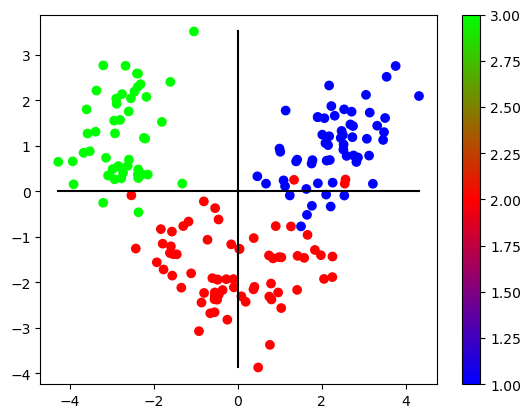

In [8]:
tx = model.transform(x)
plt.scatter(tx[:, 0],tx[:, 1], c=y, cmap="brg")
plt.plot([min(tx[:, 0]),max(tx[:, 0])], [0, 0], color="#000000")#x軸
plt.plot([0, 0],[min(tx[:, 1]),max(tx[:, 1])], color="#000000")#y軸
plt.colorbar()
plt.show()

# biplotを作る
subplotを使いx軸とy軸で両軸グラフを作り、ax1にはPC1とPC2の散布図を、ax2には因子負荷量をプロットして解釈性を可視化する。

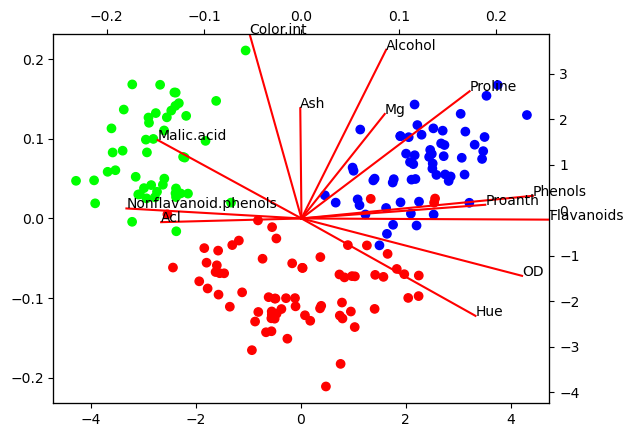

In [9]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax2 = ax.twiny()
ax1.scatter(tx[:, 0], tx[:, 1], c=y, cmap="brg")
xlim = [abs(max(factor[0])), abs(min(factor[0]))]
ylim = [abs(max(factor[1])), abs(min(factor[1]))]
for i in range(len(x_name)):
    ax2.plot([0, factor[0][i]], [0, factor[1][i]], color="#FF0000")
    ax2.text(factor[0][i], factor[1][i], x_name[i])
ax2.set_xlim(-max(xlim), max(xlim))
ax2.set_ylim(-max(ylim), max(ylim))
plt.show()

主成分で因子負荷量が正に大きければプラスに大きな値を取り、負に大きければマイナスに大きな値になる。

実際にデータを確認してみると第一主成分は「Color.int」が正に大きく第二主成分では「Flavanoids」が正に大きいことが分かる。

In [10]:
df1 = df.query("Wine==1")
df2 = df.query("Wine==2")
df3 = df.query("Wine==3")

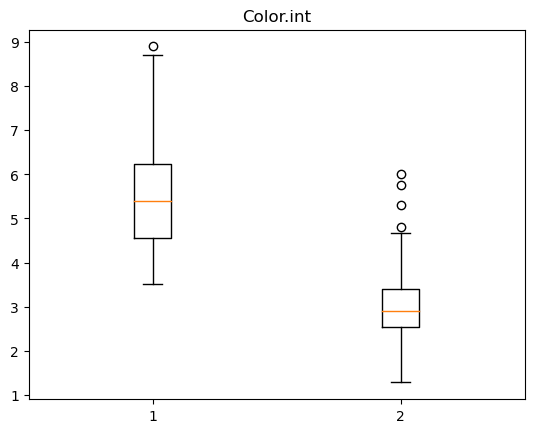

In [11]:
plt.title("Color.int")
plt.boxplot([df1["Color.int"]. values,df2["Color.int"].values])
plt.show()

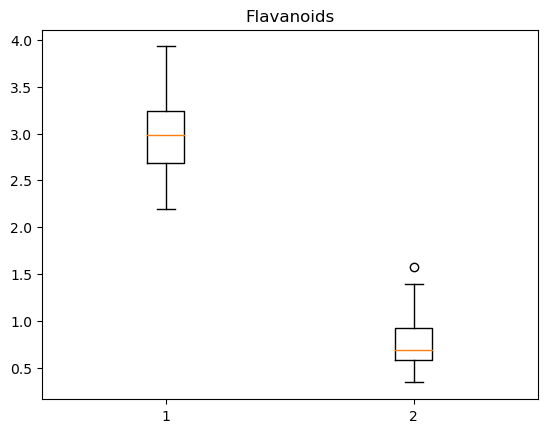

In [12]:
plt.title("Flavanoids")
plt.boxplot([df1["Flavanoids"]. values,df3["Flavanoids"].values])
plt.show()